In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from lightgbm import plot_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score



In [3]:
train_feature = pd.read_csv("./data/train_features.csv")
train_label = pd.read_csv("./data/train_labels.csv")
sample_submission = pd.read_csv("./data/sample_submission.csv")
test_feature = pd.read_csv("./data/test_features.csv")

In [27]:
train_feature

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [105]:
train_feature['id'].unique()

array([   0,    1,    2, ..., 3122, 3123, 3124], dtype=int64)

In [26]:
test_feature

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912
...,...,...,...,...,...,...,...,...
469195,3906,595,0.104191,-0.784979,0.639513,-10.475346,14.095361,-190.358982
469196,3906,596,0.103297,-0.758954,0.615687,-25.360272,-8.523018,-180.393291
469197,3906,597,0.128294,-0.749389,0.586184,-27.917723,-23.186245,-162.624160
469198,3906,598,0.104130,-0.692731,0.573397,-27.847980,-30.407555,-138.761676


In [11]:
train_label['label_desc'].value_counts()

Non-Exercise                                    1518
Device on Table                                   97
Plank                                             55
Wall Squat                                        48
Jump Rope                                         47
                                                ... 
Triceps Kickback (knee on bench) (right arm)      13
Triceps Kickback (knee on bench) (left arm)       12
Dumbbell Row (knee on bench) (right arm)          12
Dumbbell Row (knee on bench) (left arm)           12
Arm Band Adjustment                               12
Name: label_desc, Length: 61, dtype: int64

In [61]:
train_label

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


전체 데이터 3,125의 데이터 중 1518개의 Non-Exercise가 발생.

## 1. train_feature에서 ID별 데이터 통합작업 요구


In [12]:
train_feature

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [13]:
train_feature.describe()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
count,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06
mean,1.562000e+03,2.995000e+02,-4.489683e-01,-1.617913e-01,5.571471e-02,-1.307982e+00,-4.337745e-01,8.864100e-01
std,9.021100e+02,1.732049e+02,7.173082e-01,5.872018e-01,4.724824e-01,6.083228e+01,7.329832e+01,7.063345e+01
min,0.000000e+00,0.000000e+00,-8.838427e+00,-9.299714e+00,-8.316425e+00,-1.811127e+03,-1.594256e+03,-1.346143e+03
25%,7.810000e+02,1.497500e+02,-9.625643e-01,-5.163020e-01,-2.123550e-01,-2.048984e+01,-1.865320e+01,-1.546226e+01
50%,1.562000e+03,2.995000e+02,-6.560482e-01,-2.033985e-01,3.031258e-02,-1.421819e+00,-2.642753e-01,-1.798643e-01
75%,2.343000e+03,4.492500e+02,-1.701162e-04,1.406493e-01,3.581982e-01,1.572245e+01,1.676328e+01,1.641878e+01
max,3.124000e+03,5.990000e+02,8.426799e+00,8.484622e+00,6.432668e+00,1.870256e+03,2.111657e+03,1.255849e+03


In [62]:
features = ['id', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z']
X_data = train_feature[features].groupby('id').agg(['sum','median','max', 'min', 'mean'])
X_exam = test_feature[features].groupby('id').agg(['sum','median','max', 'min', 'mean'])

## ID별로 데이터의 sum, median,max, min, mean을 구함

In [63]:
X_data

acc_x                                               acc_y  \
             sum    median       max       min      mean         sum   
id                                                                     
0     558.797337  0.956149  1.344268  0.591940  0.931329 -131.082711   
1    -459.948117 -0.805767  1.234020 -2.156208 -0.766580 -190.354639   
2      23.901616  0.140667  1.219836 -1.142847  0.039836  -49.441742   
3    -532.621192 -0.880343 -0.622250 -1.417751 -0.887702  -52.600737   
4    -395.410844 -0.941146  0.599720 -2.429109 -0.659018 -202.240064   
...          ...       ...       ...       ...       ...         ...   
3120 -180.272174 -0.105704  0.390798 -1.624711 -0.300454 -401.525652   
3121 -584.578686 -0.980053 -0.446650 -1.575455 -0.974298 -140.023548   
3122 -668.547732 -1.057063  0.744666 -2.578974 -1.114246 -217.317785   
3123  -66.799727 -0.178023  0.915846 -0.929133 -0.111333  528.216970   
3124 -260.428968 -0.613512  0.538809 -1.013813 -0.434048 -373.805701   

                                              ...         gy_y             \
        median       max       min      mean  ...          sum     median   
id                                            ...                           
0    -0.240638  0.176871 -0.624113 -0.218471  ... -2015.703683  -2.362230   
1    -0.228905  0.700065 -1.295598 -0.317258  ...  1044.284884   8.043707   
2    -0.062598  0.650645 -0.690990 -0.082403  ...   358.725917  19.306132   
3    -0.054577  0.283721 -0.540827 -0.087668  ...  2880.558352   1.783260   
4    -0.168467  1.724782 -2.055076 -0.337067  ...  5791.027696   0.977772   
...        ...       ...       ...       ...  ...          ...        ...   
3120 -0.737803  0.168070 -1.289257 -0.669209  ... -2941.679051   1.894707   
3121 -0.208131  0.117965 -0.609743 -0.233373  ...  2272.105392   1.609188   
3122 -0.306436  1.268138 -2.036646 -0.362196  ...  6103.301689  35.748108   
3123  0.902584  1.473727  0.272406  0.880362  ... -6965.012570 -26.925407   
3124 -0.677878 -0.193247 -0.952761 -0.623010  ...  -736.121776   3.510459   

                                                gy_z                         \
             max         min       mean          sum     median         max   
id                                                                            
0      69.847244  -85.887677  -3.359506   709.264425   1.913286   55.953827   
1     389.608060 -315.096003   1.740475   835.976169  -0.655819  340.170199   
2     297.320834 -249.953944   0.597877  1831.974458   3.568888   55.642836   
3     159.083788  -82.537304   4.800931 -3521.938833  -3.853078   56.456908   
4     284.952954 -243.909948   9.651713  2672.029417  -0.750283  221.015193   
...          ...         ...        ...          ...        ...         ...   
3120  134.585268 -190.818371  -4.902798   -32.415360  -2.190464  121.958427   
3121   53.341929  -33.757220   3.786842 -1675.342583  -2.073951   57.349878   
3122  388.749570 -380.819269  10.172169 -1033.698245  -7.884967  453.943910   
3123  319.723456 -148.431769 -11.608354 -3558.151108 -13.745464  310.558507   
3124   90.173541 -134.268304  -1.226870 -1948.094865   1.583578   80.302840   

                            
             min      mean  
id                          
0     -79.930029  1.182107  
1    -270.980823  1.393294  
2     -44.192071  3.053291  
3     -85.600536 -5.869898  
4    -270.581913  4.453382  
...          ...       ...  
3120  -79.392292 -0.054026  
3121  -39.777626 -2.792238  
3122 -247.908573 -1.722830  
3123 -206.580638 -5.930252  
3124 -100.845205 -3.246825  

[3125 rows x 30 columns]

In [67]:
y_data = train_label['label']

In [108]:
y_data

RangeIndex(start=0, stop=3125, step=1)

In [95]:
X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=26,stratify=y_data)

In [71]:
X_train

acc_x                                               acc_y  \
             sum    median       max       min      mean         sum   
id                                                                     
2188  -18.630345 -0.027624  0.221294 -0.262053 -0.031051 -342.415236   
974  -227.273410 -0.501044  0.913532 -1.800741 -0.378789 -393.342705   
2474 -341.126707 -0.550785  0.365672 -1.770737 -0.568545 -288.906199   
2988 -552.252617 -0.994234  1.009492 -1.231801 -0.920421  -89.084210   
2586 -135.910728 -0.328313  1.030981 -1.011815 -0.226518 -343.514700   
...          ...       ...       ...       ...       ...         ...   
910  -482.487619 -0.901097  1.932276 -3.921610 -0.804146  557.792605   
2476 -395.873647 -0.863336  0.316146 -1.295173 -0.659789 -183.869474   
1321 -542.874842 -0.923717 -0.304211 -1.317300 -0.904791 -213.413855   
1861 -101.578521 -0.168587 -0.043492 -0.328448 -0.169298  229.548941   
34   -501.727398 -0.983385  0.855360 -1.462442 -0.836212 -103.182627   

                                              ...         gy_y             \
        median       max       min      mean  ...          sum     median   
id                                            ...                           
2188 -0.570601 -0.415513 -0.830104 -0.570692  ...   359.074083   0.620745   
974  -0.741457  0.466502 -1.366106 -0.655571  ... -2381.352534  45.738044   
2474 -0.483459  0.368962 -1.066751 -0.481510  ... -1467.616686  -8.170860   
2988 -0.114951  0.242499 -0.920842 -0.148474  ...  6072.465730   5.229477   
2586 -0.407647  0.137013 -1.254863 -0.572524  ...   394.808738  -1.594384   
...        ...       ...       ...       ...  ...          ...        ...   
910   0.628007  4.782952 -1.355811  0.929654  ...  3722.507773  10.487544   
2476 -0.306232  0.209261 -0.971621 -0.306449  ... -4856.575249 -20.979431   
1321 -0.358850  0.183804 -0.965970 -0.355690  ...   114.011597  -6.207376   
1861  0.391613  0.494540  0.183308  0.382582  ...  -853.371730  -1.405027   
34   -0.197187  0.459281 -1.343254 -0.171971  ...  2926.086004   2.808340   

                                                gy_z                         \
             max         min       mean          sum     median         max   
id                                                                            
2188   19.146920  -22.441165   0.598457 -1585.361679  -2.740297    6.952858   
974   480.377095 -467.687724  -3.968921  1048.422836  16.984884  199.638126   
2474  207.352460 -130.408918  -2.446028  3381.519044   0.675101  128.060221   
2988  163.554789 -126.204720  10.120776  4395.841754   2.401377  149.023767   
2586  139.366064 -181.596180   0.658015  5750.099060   0.719449  220.527347   
...          ...         ...        ...          ...        ...         ...   
910   269.895405 -336.579668   6.204180  -646.315028  -4.262547  345.053663   
2476  157.989980 -174.118735  -8.094292 -1646.644931   5.916001   61.400566   
1321  211.979770 -150.194204   0.190019  1018.678427   1.935399  163.579321   
1861   16.461142  -17.307971  -1.422286   867.710259   1.547402    8.436875   
34    279.008661 -229.480822   4.876810  -961.909575  -1.623336  207.073701   

                            
             min      mean  
id                          
2188  -12.760140 -2.642269  
974  -291.260433  1.747371  
2474  -75.685726  5.635865  
2988  -70.388711  7.326403  
2586 -126.837659  9.583498  
...          ...       ...  
910  -274.836811 -1.077192  
2476 -102.006488 -2.744408  
1321 -124.317408  1.697797  
1861  -11.214843  1.446184  
34   -237.734698 -1.603183  

[2500 rows x 30 columns]

In [72]:
y_train

2188    39
974     15
2474    26
2988    26
2586     0
        ..
910     34
2476    36
1321    26
1861    39
34      26
Name: label, Length: 2500, dtype: int64

In [ ]:
## 모델 생성

In [96]:
rf_clf = RandomForestClassifier(random_state=26)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy =  accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도 : {:.4f}".format(accuracy))

랜덤 포레스트 정확도 : 0.7408


## GridSearchCV
## 최적 하이퍼 파라미터 

In [99]:
%%time
from sklearn.model_selection import GridSearchCV
params={
    'n_estimators':[50,100,150],
    'criterion':['gini','entropy'],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}
rf_clf = RandomForestClassifier(random_state=25, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

Wall time: 3min 34s


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [50, 100, 150]})

In [100]:
print("최적 하이퍼 파라미터 : \n", grid_cv.best_params_)

최적 하이퍼 파라미터 : 
 {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


In [101]:
pred = grid_cv.best_estimator_.predict(X_test)
accuracy =  accuracy_score(y_test, pred)
print('accuracy{:.4f}'.format(accuracy))

accuracy0.6848


^C


acc_x                                               acc_y  \
             sum    median       max       min      mean         sum   
id                                                                     
2477 -216.123296 -0.374061  0.256777 -1.088213 -0.360205 -536.179835   
1651  157.894736  0.551805  1.113997 -2.000100  0.263158 -381.670571   
2072  291.267147  0.485600  0.497133  0.474879  0.485445  418.885707   
1564 -612.836167 -1.021592 -0.909940 -1.154763 -1.021394 -105.783361   
496   -58.415267 -0.017109  0.775870 -1.313272 -0.097359 -448.315415   
...          ...       ...       ...       ...       ...         ...   
2994 -614.597138 -1.048603 -0.386110 -1.312891 -1.024329  -55.401133   
1206  232.335404  0.355832  0.731711  0.024141  0.387226 -349.088778   
1429  203.788777  0.327546  2.121963 -0.537225  0.339648  -11.937834   
535   -25.564904 -0.045017  0.157657 -0.162635 -0.042608 -165.545104   
2677  -33.131382  0.116509  0.720067 -1.960035 -0.055219 -339.890750   

                                              ...         gy_y             \
        median       max       min      mean  ...          sum     median   
id                                            ...                           
2477 -0.906927 -0.232327 -1.369453 -0.893633  ...  -642.125293   0.655537   
1651 -0.597262 -0.045327 -1.726512 -0.636118  ... -5793.920770  -1.798785   
2072  0.698152  0.706253  0.672546  0.698143  ...   952.268859   1.587515   
1564 -0.165880 -0.032894 -0.350613 -0.176306  ...  1323.189060   1.721914   
496  -0.743502 -0.120807 -1.381425 -0.747192  ...  4338.352441  13.047071   
...        ...       ...       ...       ...  ...          ...        ...   
2994 -0.150162  1.010248 -0.684790 -0.092335  ... -1073.951833  -4.364545   
1206 -0.618281  0.160542 -1.562904 -0.581815  ...   303.872343  -0.580847   
1429 -0.410502  2.174359 -1.611412 -0.019896  ...  1247.127641  -0.833655   
535  -0.294952  0.063737 -0.603296 -0.275909  ...   608.833022   1.107278   
2677 -0.570146 -0.064989 -1.377406 -0.566485  ...   115.870974  -0.312819   

                                               gy_z                        \
             max         min      mean          sum    median         max   
id                                                                          
2477   96.122176 -104.027696 -1.070209 -1617.811390 -8.013142  148.391224   
1651  144.745028 -258.832029 -9.656535 -2860.263426 -9.543914  443.325985   
2072    2.476343    0.548132  1.587115   534.576325  0.889626    3.607707   
1564   34.605089  -35.225795  2.205315  -849.362556  0.059034   22.258185   
496   210.902795 -218.777267  7.230587  1302.679553 -1.605227  144.672609   
...          ...         ...       ...          ...       ...         ...   
2994  122.493193  -99.273116 -1.789920  1168.660220  2.535949   73.844219   
1206   61.384140  -72.859979  0.506454   165.260244  1.877320   63.710888   
1429  137.149230 -139.403285  2.078546  2038.984334 -8.683884  336.267673   
535    25.528535  -30.418400  1.014722 -1506.390109 -2.651715    9.722770   
2677  407.038857 -241.725241  0.193118  -125.560372 -0.784965  307.167905   

                            
             min      mean  
id                          
2477 -109.842753 -2.696352  
1651 -213.466909 -4.767106  
2072   -1.559874  0.890961  
1564  -27.617669 -1.415604  
496  -196.868055  2.171133  
...          ...       ...  
2994  -64.640623  1.947767  
1206 -118.200129  0.275434  
1429 -207.709742  3.398307  
535   -11.909493 -2.510650  
2677 -122.091444 -0.209267  

[2500 rows x 30 columns]

In [135]:
X_columns = [agg + '_' + column for agg,column in X_train.columns]
X_train.columns = X_columns
X_train.columns = X_columns
display(X_train.head())

,acc_x_sum,acc_x_median,acc_x_max,acc_x_min,acc_x_mean,acc_y_sum,acc_y_median,acc_y_max,acc_y_min,acc_y_mean,...,gy_y_sum,gy_y_median,gy_y_max,gy_y_min,gy_y_mean,gy_z_sum,gy_z_median,gy_z_max,gy_z_min,gy_z_mean
id,,,,,,,,,,,,,,,,,,,,,
2378,-551.615903,-1.159011,0.647306,-2.411114,-0.919360,195.576292,0.377019,1.032126,-0.727344,0.325960,...,306.797681,-1.432744,78.647073,-62.633158,0.511329,4161.626580,19.603713,288.976904,-293.641489,6.936044
2434,96.219504,0.239323,0.934409,-1.044087,0.160366,-235.669013,-0.462570,0.243393,-0.822835,-0.392782,...,4947.536880,0.171998,177.832775,-145.522465,8.245895,-2400.511127,-1.051091,108.902040,-112.388207,-4.000852
2190,-313.196330,-0.656982,0.858616,-1.984193,-0.521994,360.436279,0.705779,3.307215,-1.249553,0.600727,...,1219.772705,2.117287,204.371047,-218.443071,2.032955,1553.792718,2.664926,437.157233,-386.696011,2.589655
1604,-520.760935,-0.836998,-0.028007,-2.267254,-0.867935,-166.559029,-0.364412,0.701041,-1.207043,-0.277598,...,1985.425203,-1.360881,265.074105,-117.033260,3.309042,-265.469474,1.233388,109.898291,-123.040302,-0.442449
1683,-449.112011,-0.842511,0.125786,-1.887013,-0.748520,-202.536752,-0.281175,0.135535,-0.932503,-0.337561,...,400.567339,2.330369,308.141089,-266.891997,0.667612,1633.706838,-4.934602,213.267630,-126.696896,2.722845


In [132]:
X_columns = [agg + '_' + column for agg,column in X_test.columns]
X_test.columns = X_columns
X_test.columns = X_columns
display(X_test.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 2477 to 2677
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   acc_x_sum     2500 non-null   float64
 1   acc_x_median  2500 non-null   float64
 2   acc_x_max     2500 non-null   float64
 3   acc_x_min     2500 non-null   float64
 4   acc_x_mean    2500 non-null   float64
 5   acc_y_sum     2500 non-null   float64
 6   acc_y_median  2500 non-null   float64
 7   acc_y_max     2500 non-null   float64
 8   acc_y_min     2500 non-null   float64
 9   acc_y_mean    2500 non-null   float64
 10  acc_z_sum     2500 non-null   float64
 11  acc_z_median  2500 non-null   float64
 12  acc_z_max     2500 non-null   float64
 13  acc_z_min     2500 non-null   float64
 14  acc_z_mean    2500 non-null   float64
 15  gy_x_sum      2500 non-null   float64
 16  gy_x_median   2500 non-null   float64
 17  gy_x_max      2500 non-null   float64
 18  gy_x_min      2500 non-nu

In [134]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 2378 to 806
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (acc_x, sum)     625 non-null    float64
 1   (acc_x, median)  625 non-null    float64
 2   (acc_x, max)     625 non-null    float64
 3   (acc_x, min)     625 non-null    float64
 4   (acc_x, mean)    625 non-null    float64
 5   (acc_y, sum)     625 non-null    float64
 6   (acc_y, median)  625 non-null    float64
 7   (acc_y, max)     625 non-null    float64
 8   (acc_y, min)     625 non-null    float64
 9   (acc_y, mean)    625 non-null    float64
 10  (acc_z, sum)     625 non-null    float64
 11  (acc_z, median)  625 non-null    float64
 12  (acc_z, max)     625 non-null    float64
 13  (acc_z, min)     625 non-null    float64
 14  (acc_z, mean)    625 non-null    float64
 15  (gy_x, sum)      625 non-null    float64
 16  (gy_x, median)   625 non-null    float64
 17  (gy_x, max)  

In [129]:
from lightgbm import LGBMClassifier



[1]	valid_0's multi_logloss: 1.88537
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.74649
[3]	valid_0's multi_logloss: 1.6552
[4]	valid_0's multi_logloss: 1.59655
[5]	valid_0's multi_logloss: 1.54536
[6]	valid_0's multi_logloss: 1.50236
[7]	valid_0's multi_logloss: 1.46424
[8]	valid_0's multi_logloss: 1.43556
[9]	valid_0's multi_logloss: 1.40981
[10]	valid_0's multi_logloss: 1.38816
[11]	valid_0's multi_logloss: 1.36521
[12]	valid_0's multi_logloss: 1.34881
[13]	valid_0's multi_logloss: 1.33363
[14]	valid_0's multi_logloss: 1.3207
[15]	valid_0's multi_logloss: 1.31086
[16]	valid_0's multi_logloss: 1.3013
[17]	valid_0's multi_logloss: 1.29218
[18]	valid_0's multi_logloss: 1.28709
[19]	valid_0's multi_logloss: 1.28282
[20]	valid_0's multi_logloss: 1.28078
[21]	valid_0's multi_logloss: 1.27831
[22]	valid_0's multi_logloss: 1.27686
[23]	valid_0's multi_logloss: 1.27597
[24]	valid_0's multi_logloss: 1.27748
[25]	valid_0's multi_logloss: 1.27864


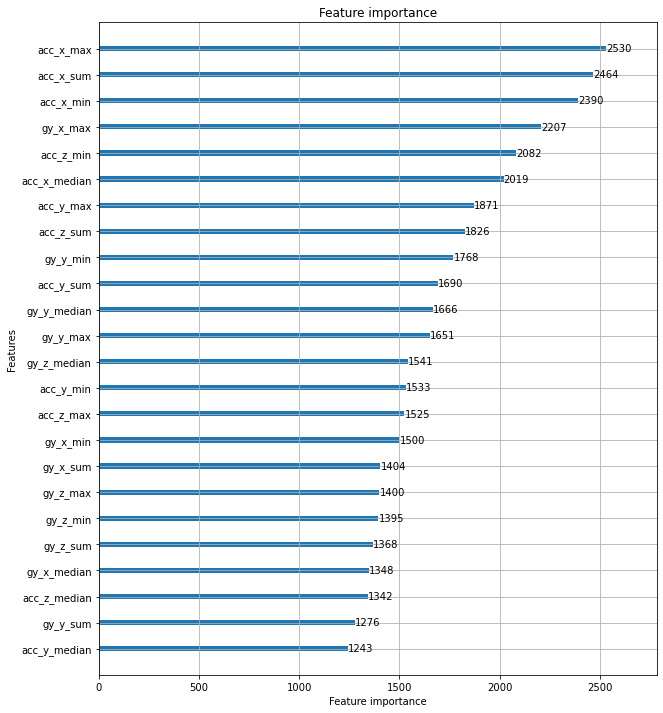

In [175]:
# 객체 생성
model = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgb_model = model.fit(X_train, y_train, early_stopping_rounds=100, 
                        eval_metric='logloss',eval_set=evals,verbose=True)

# 예측하기
pred = lgb_model.predict(X_test)
pred_proba = lgb_model.predict_proba(X_test)[:,1]

confusion = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)
## precision = precision_score(y_test, pred)
## recall = recall_score(y_test, pred)
## F1 = f1_score(y_test, pred)
## AUC = roc_auc_score(y_test, pred, pred_proba)
# 특성 중요도 시각화
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgb_model, ax=ax)
print('오차행렬:\n', confusion)
print('\n정확도: {:.4f}'.format(accuracy))
## print('정밀도: {:.4f}'.format(precision))
## print('재현율: {:.4f}'.format(recall))
## print('F1: {:.4f}'.format(F1))
## print('AUC: {:.4f}'.format(AUC))